<a href="https://colab.research.google.com/github/SCARLXRD-1/Challenge_Alura-_Store/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()


,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



 Primer análisis,calcular el ingreso total de cada tienda. Sumando los valores de la columna Precio de cada conjunto de datos de la tienda para estimar los ingresos.

 Paso 1: Crear mi lista de tiendas

In [2]:

tiendas = [tienda, tienda2, tienda3, tienda4]


Paso 2 :Calculo los totales de precios por tienda

In [3]:
ingresos_por_tienda = [tienda['Precio'].sum() for tienda in tiendas]


Paso 3: Mostrar los resultados

In [4]:
for i, ingreso in enumerate(ingresos_por_tienda, start=1):
    print(f"Ingreso total Tienda {i}: {ingreso}")

Ingreso total Tienda 1: 1150880400.0
Ingreso total Tienda 2: 1116343500.0
Ingreso total Tienda 3: 1098019600.0
Ingreso total Tienda 4: 1038375700.0


Gráficas de los precios por tienda

Importo la librería con la que estare trabajando para las gráficas

In [6]:
import matplotlib.pyplot as plt


Paso 2: Creo etiquetas para las tiendas
Como son 4 tiendas, usaré una lista de nombres:

In [7]:
nombres_tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']

 Paso 3: Crear el gráfico

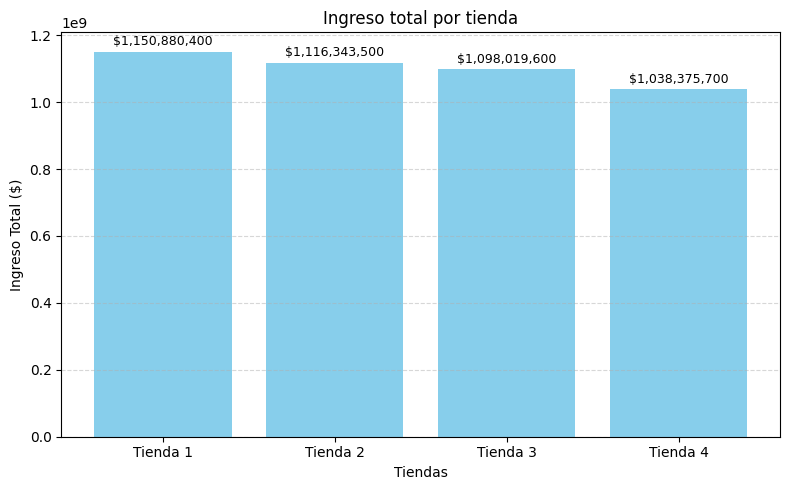

In [77]:
plt.figure(figsize=(8, 5))
plt.bar(nombres_tiendas, ingresos_por_tienda, color='skyblue')

plt.title('Ingreso total por tienda')
plt.xlabel('Tiendas')
plt.ylabel('Ingreso Total ($)')
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Esta partesera para que se visualicen mis valores encima de cada barra
for i, valor in enumerate(ingresos_por_tienda):
    plt.text(i, valor + 20000000, f"${valor:,.0f}", ha='center', fontsize=9)

plt.tight_layout()
plt.show()

# 2. Ventas por categoría

Mi lista


In [78]:
tiendas = [tienda, tienda2, tienda3, tienda4]

Paso 1: Agrupare por categoría y contar las ventas
Voy a  usar el método `groupby()` de pandas para agrupar los productos por Categoría del Producto y luego contar la cantidad de ventas de cada categoría con el método `size().`

In [79]:
ventas_por_categoria = [tienda.groupby('Categoría del Producto').size() for tienda in tiendas]

Paso 2: Mostrare las ventas por categoría



In [80]:
for i, ventas in enumerate(ventas_por_categoria, start=1):
    print(f"\n📦 Tienda {i} - Ventas por categoría:")
    print(ventas.reset_index(name='Ventas'))


📦 Tienda 1 - Ventas por categoría:
    Categoría del Producto  Ventas
0  Artículos para el hogar     171
1     Deportes y diversión     284
2        Electrodomésticos     312
3             Electrónicos     448
4   Instrumentos musicales     182
5                 Juguetes     324
6                   Libros     173
7                  Muebles     465

📦 Tienda 2 - Ventas por categoría:
    Categoría del Producto  Ventas
0  Artículos para el hogar     181
1     Deportes y diversión     275
2        Electrodomésticos     305
3             Electrónicos     422
4   Instrumentos musicales     224
5                 Juguetes     313
6                   Libros     197
7                  Muebles     442

📦 Tienda 3 - Ventas por categoría:
    Categoría del Producto  Ventas
0  Artículos para el hogar     177
1     Deportes y diversión     277
2        Electrodomésticos     278
3             Electrónicos     451
4   Instrumentos musicales     177
5                 Juguetes     315
6                

 Paso 3: Mostrar los resultados en Gráfico por tienda

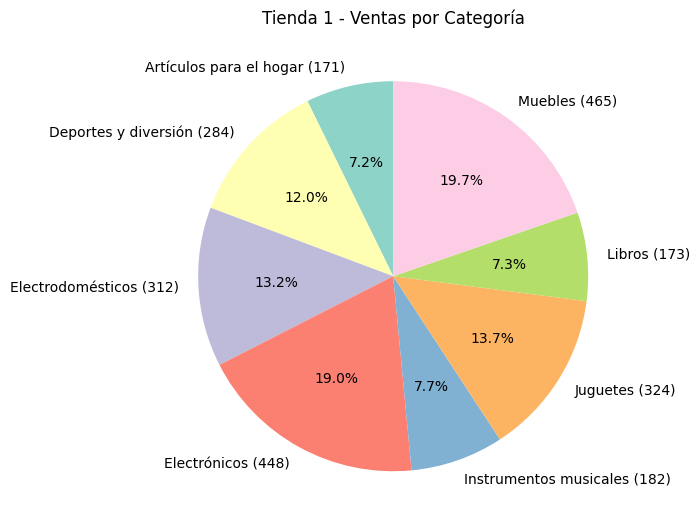

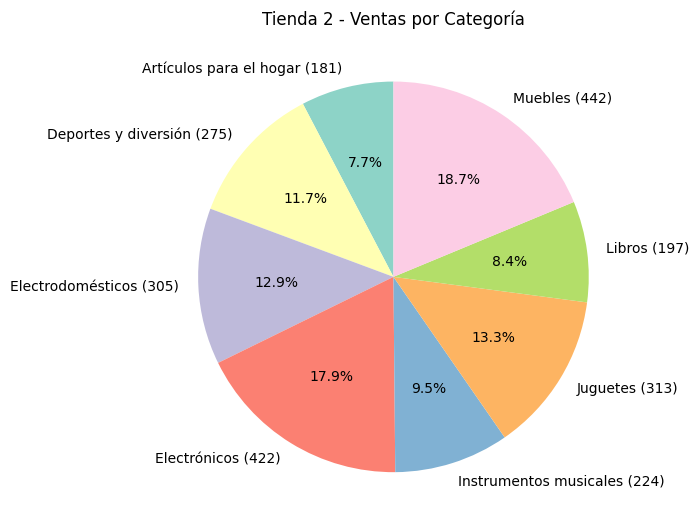

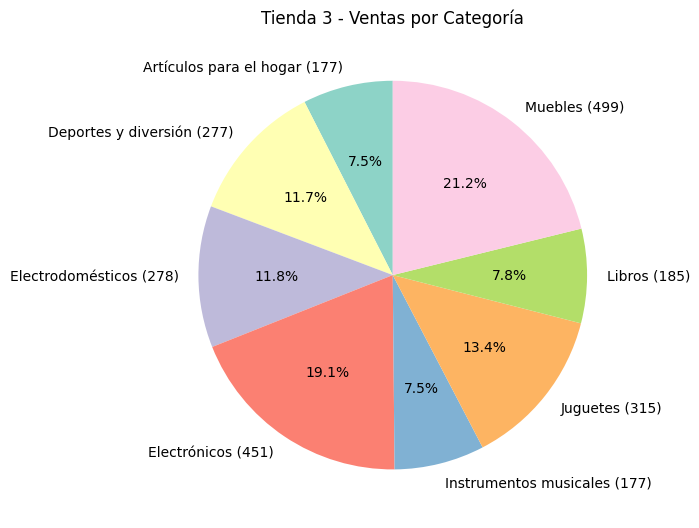

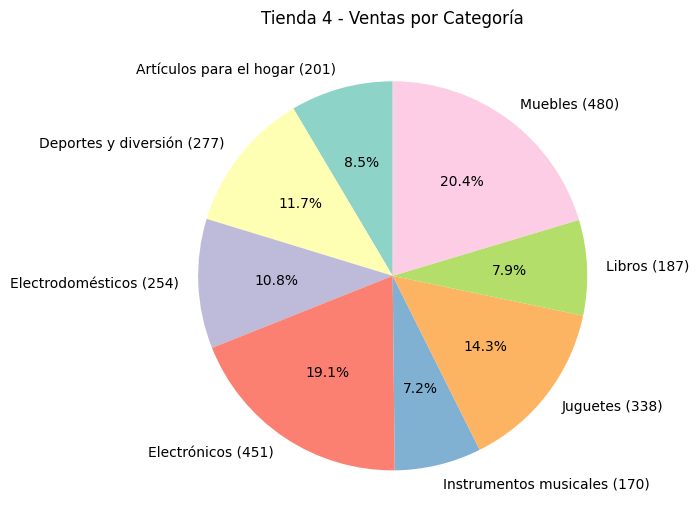

In [12]:
for i, ventas in enumerate(ventas_por_categoria, start=1):
    plt.figure(figsize=(7, 7))
    plt.pie(
        ventas,
        labels=[f'{categoria} ({cantidad})' for categoria, cantidad in ventas.items()],
        autopct='%1.1f%%',
        startangle=90,
        colors=plt.cm.Set3.colors
    )
    plt.title(f'Tienda {i} - Ventas por Categoría')
    plt.tight_layout()
    plt.show()

# 3. Calificación promedio de la tienda


Paso 1: Usamos nuestra lista con los DataFrames de las tiendas

In [26]:
tiendas = [tienda, tienda2, tienda3, tienda4]
nombres_tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']

Paso 2: Calcular la calificación promedio por tienda

In [32]:
calificaciones_promedio = [round(tienda['Calificación'].mean(), 2) for tienda in tiendas]


Paso 3: Mostrar los resultados

In [34]:
for i, promedio in enumerate(calificaciones_promedio, start=1):
    print(f"Tienda {i} - Calificación promedio: {promedio}")

Tienda 1 - Calificación promedio: 3.98
Tienda 2 - Calificación promedio: 4.04
Tienda 3 - Calificación promedio: 4.05
Tienda 4 - Calificación promedio: 4.0


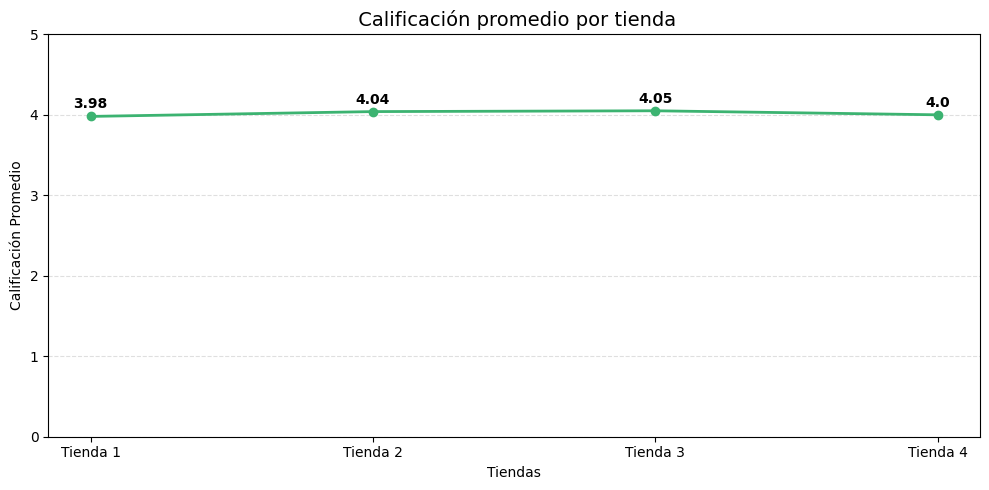

In [36]:
plt.figure(figsize=(10, 5))
plt.plot(nombres_tiendas, calificaciones_promedio, marker='o', linestyle='-', color='mediumseagreen', linewidth=2)


plt.title(" Calificación promedio por tienda", fontsize=14)
plt.xlabel("Tiendas")
plt.ylabel("Calificación Promedio")
plt.ylim(0, 5)
plt.grid(axis='y', linestyle='--', alpha=0.4)

# Muestro los valores sobre los puntos
for i, v in enumerate(calificaciones_promedio):
    plt.text(i, v + 0.1, str(v), ha='center', fontweight='bold')

plt.tight_layout()
plt.show()


# 4. Productos más y menos vendidos

Paso 1: Contar ventas por producto
Usare`.value_counts()` sobre la columna "Producto" igual que hice con  categoría:

In [54]:
ventas_por_producto = [tienda['Producto'].value_counts() for tienda in tiendas]


Paso 2: Identificare el producto más y menos vendido por tienda
Vamos a sacar el más vendido `(idxmax)` y el menos vendido `(idxmin)` por tienda:


In [55]:
productos_mas_vendidos = [ventas.idxmax() for ventas in ventas_por_producto]
productos_menos_vendidos = [ventas.idxmin() for ventas in ventas_por_producto]

cantidades_mas_vendidas = [ventas.max() for ventas in ventas_por_producto]
cantidades_menos_vendidas = [ventas.min() for ventas in ventas_por_producto]

Paso 3: Mostrar los resultados
Imprimimos los datos por tienda de forma clara:

In [56]:
for i in range(len(tiendas)):
    print(f"📦 Tienda {i+1}:")
    print(f"  🔝 Producto más vendido: {productos_mas_vendidos[i]} ({cantidades_mas_vendidas[i]} ventas)")
    print(f"  🔻 Producto menos vendido: {productos_menos_vendidos[i]} ({cantidades_menos_vendidas[i]} venta{'s' if cantidades_menos_vendidas[i] > 1 else ''})\n")

📦 Tienda 1:
  🔝 Producto más vendido: Microondas (60 ventas)
  🔻 Producto menos vendido: Auriculares con micrófono (33 ventas)

📦 Tienda 2:
  🔝 Producto más vendido: Iniciando en programación (65 ventas)
  🔻 Producto menos vendido: Juego de mesa (32 ventas)

📦 Tienda 3:
  🔝 Producto más vendido: Kit de bancas (57 ventas)
  🔻 Producto menos vendido: Bloques de construcción (35 ventas)

📦 Tienda 4:
  🔝 Producto más vendido: Cama box (62 ventas)
  🔻 Producto menos vendido: Guitarra eléctrica (33 ventas)



Paso 4: Visualizare con gráfico los productos mas vendidos por tienda

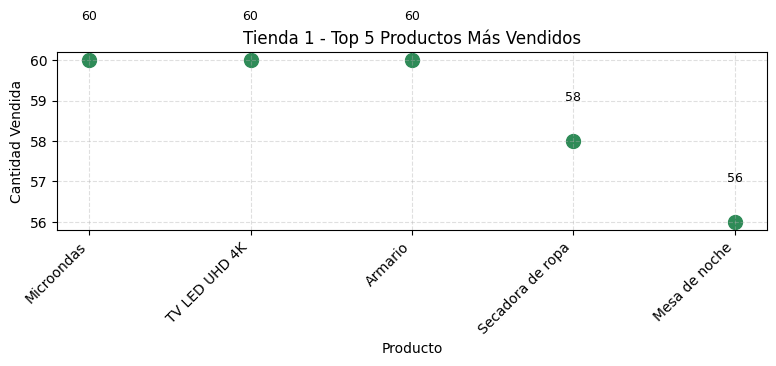

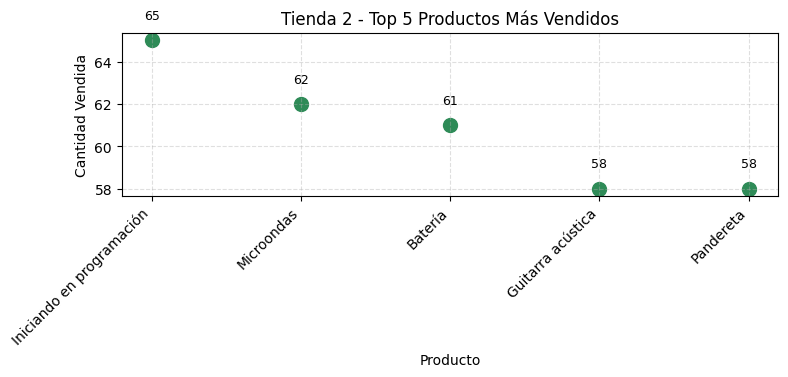

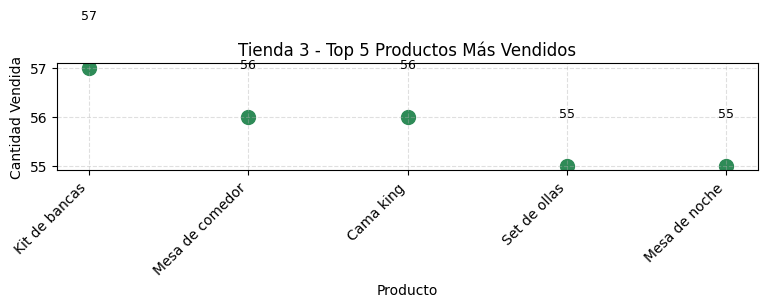

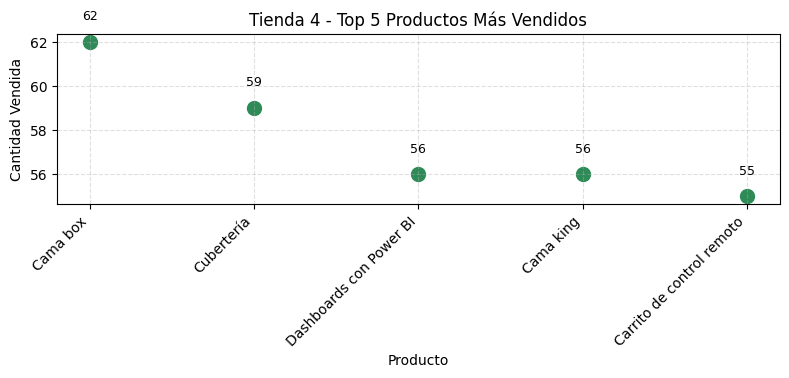

In [65]:
for i, ventas in enumerate(ventas_por_producto, start=1):
    top_5 = ventas.sort_values(ascending=False).head(5)

    plt.figure(figsize=(8, 4))
    plt.scatter(top_5.index, top_5.values, color='seagreen', s=100)

    for j, valor in enumerate(top_5.values):
        plt.text(top_5.index[j], valor + 1, str(valor), ha='center', fontsize=9)

    plt.title(f'Tienda {i} - Top 5 Productos Más Vendidos')
    plt.ylabel('Cantidad Vendida')
    plt.xlabel('Producto')
    plt.xticks(rotation=45, ha='right')
    plt.grid(True, linestyle='--', alpha=0.4)
    plt.tight_layout()
    plt.show()

Gráfico de los productos menos vendidos por tienda



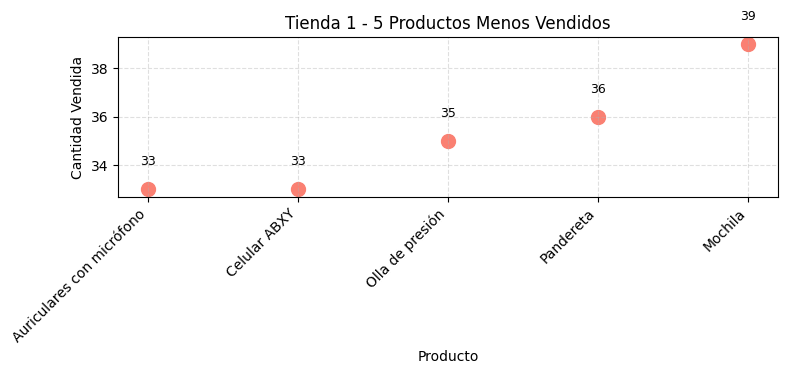

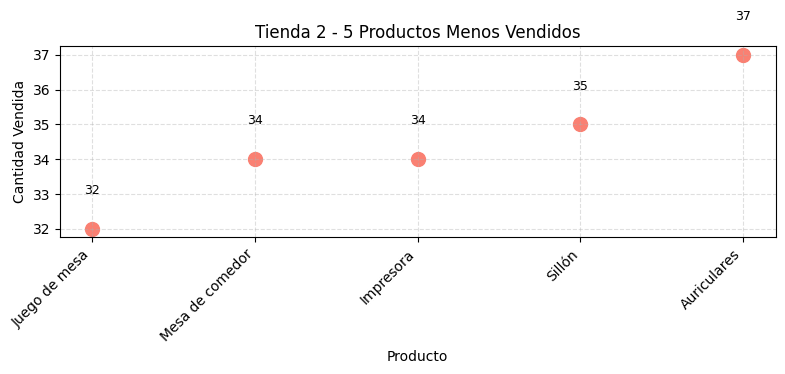

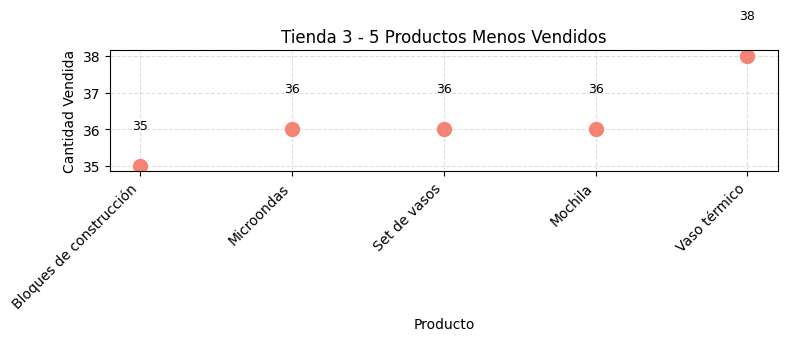

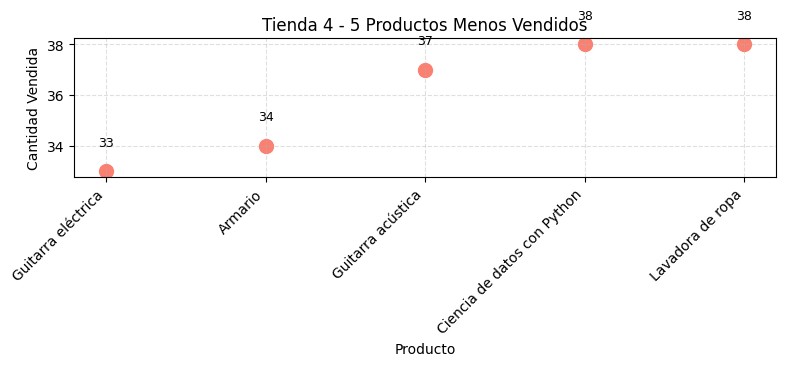

In [66]:
for i, ventas in enumerate(ventas_por_producto, start=1):
    bottom_5 = ventas.sort_values(ascending=True).head(5)

    plt.figure(figsize=(8, 4))
    plt.scatter(bottom_5.index, bottom_5.values, color='salmon', s=100)

    for j, valor in enumerate(bottom_5.values):
        plt.text(bottom_5.index[j], valor + 1, str(valor), ha='center', fontsize=9)

    plt.title(f'Tienda {i} - 5 Productos Menos Vendidos')
    plt.ylabel('Cantidad Vendida')
    plt.xlabel('Producto')
    plt.xticks(rotation=45, ha='right')
    plt.grid(True, linestyle='--', alpha=0.4)
    plt.tight_layout()
    plt.show()

# 5. Envío promedio por tienda

Paso 1: Calculo el costo de envío promedio por tienda


In [73]:
envio_promedio = [round(tienda['Costo de envío'].mean(), 2) for tienda in tiendas]

 Paso 2: Muestro los resultados

In [74]:
for i, envio in enumerate(envio_promedio, start=1):
    print(f'Costo de envío promedio Tienda {i}: {envio}')


Costo de envío promedio Tienda 1: 26018.61
Costo de envío promedio Tienda 2: 25216.24
Costo de envío promedio Tienda 3: 24805.68
Costo de envío promedio Tienda 4: 23459.46


Paso 3: Visualizo con gráfico

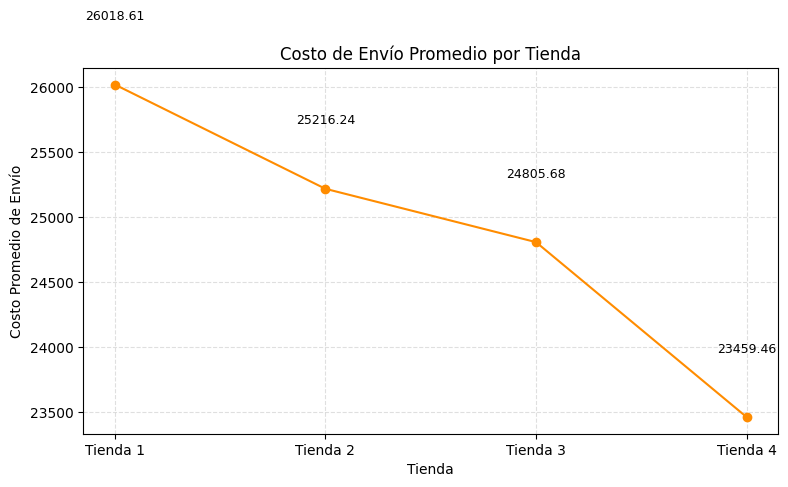

In [75]:

plt.figure(figsize=(8, 5))
plt.plot(range(1, 5), envio_promedio, marker='o', linestyle='-', color='darkorange')

for i, envio in enumerate(envio_promedio, start=1):
    plt.text(i, envio + 500, str(envio), ha='center', fontsize=9)

plt.title('Costo de Envío Promedio por Tienda')
plt.xlabel('Tienda')
plt.ylabel('Costo Promedio de Envío')
plt.xticks([1, 2, 3, 4], labels=[f'Tienda {i}' for i in range(1, 5)])
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()